In [1]:
# import libraries

import pandas as pd

import seaborn as sns

In [3]:
# read data

data = pd.read_csv("Dataset.csv", index_col=0)

data.head()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040,Target-LC50
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


The target variable 'Target-LC50' is plotted as a histogram to have a look at its distribution.

# Initial Analysis

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TPSA(Tot)    546 non-null    float64
 1   SAacc        546 non-null    float64
 2   H-050        546 non-null    int64  
 3   ML0GP        546 non-null    float64
 4   RDCHI        546 non-null    float64
 5   GATS1p       546 non-null    float64
 6   nN           546 non-null    int64  
 7   C-040        546 non-null    int64  
 8   Target-LC50  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 62.7 KB


It is observed that there are no missing values present in this dataset, and the variables are also of proper datatypes.

In [20]:
data.describe()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040,Target-LC50
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


The individual range throughout the columns vary a lot, which makes scaling of the dataset necessary.

# Visualising the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f3ba392d0>]],
      dtype=object)

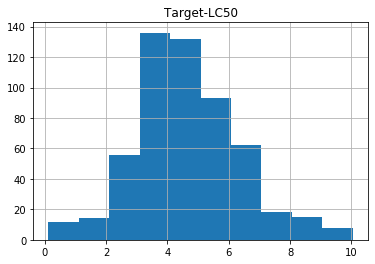

In [7]:
data.hist('Target-LC50')

The plot seems to be symmetrical about the peak of the histogram, but to be certain, a kdeplot is drawn. 

A kdeplot depicts the probability density at different values in a continuous variable.

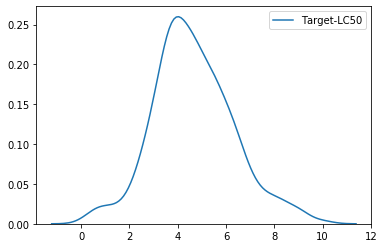

In [11]:
sns.kdeplot(data['Target-LC50'])

From this figure, the distribution of the target variable can be considered to be normal.

## Correlation

Correlation is a measure of the strength of the linear relationship between two variables. Its values lie between -1 to 1, where a value of 1 represents a perfect positive linear relationship, a value of -1 represents a perfect negative linear relationship and a value of 0 represents the scenario that the two variables share no relationship at all.



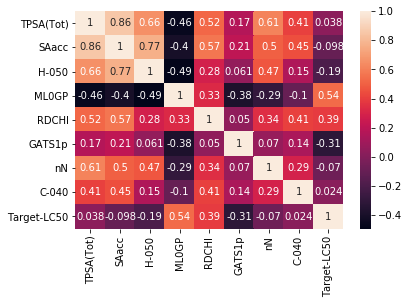

In [18]:
sns.heatmap(data.corr(), annot=True)

It seems that the target variable shares a moderately positive relationship with the features or the predictors 'ML0GP' and 'RDCHI'. It also shares a moderate negative relationship with 'GATS1p' variable. 

The other correlation values are close to 0 and hence, not of much use.

Individual scatterplots are made to further analyse the relationships between the variables.

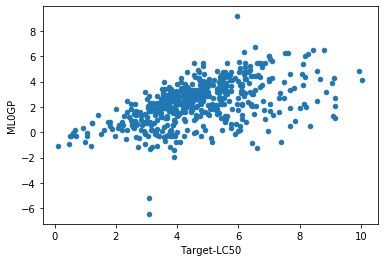

In [14]:
data.plot(kind='scatter', x='Target-LC50', y='ML0GP')

The relationship between x and y variables seems to be positive and linear, i.e., as the value of x increases, the value of y also increases. This is in accordance with the positive correlation value.

The feature 'RDCHI' also shares a similar observation.

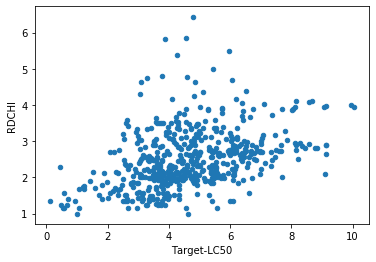

In [15]:
data.plot(kind='scatter', x='Target-LC50', y='RDCHI')

In this case, since the correlation value is less than that in the case of the feature 'ML0GP', the data points seem to be more scattered.

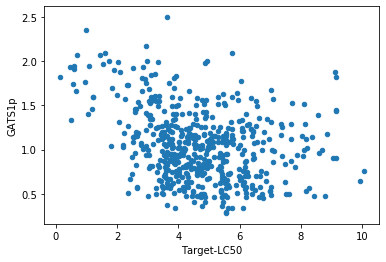

In [17]:
data.plot(kind='scatter', x='Target-LC50', y='GATS1p')

In this figure, it is observed that as the value of x increases, the value of y decreases, which results in the negative sign of the correlation value.

From all these plots, it can the concluded that the target variable shares a linear relationship with the predictors, and hence a linear model can be used here.